In this code, we implement the metropolis algorithm

We start by making an array $(m_1, m_2, m_3...m_N)$ for N spins with randomly pointing magnetizations. Each spin will look like this-

$ \vec{m}_i = \begin{pmatrix} \cos\varphi_i\sin\theta_i \\ \sin\varphi_i\sin\theta_i \\ \cos\theta_i \end{pmatrix} $



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
length = 10  # the 2d spin lattice length, we will have a total of length*length spins
num = length**2

randtheta = 2*np.pi*np.random.rand(num).reshape(length,length,1) # this reshapes it into a matrix of size length*length
randphi = np.pi*np.random.rand(num).reshape(length,length,1)

mag = np.array([np.cos(randphi)*np.sin(randtheta),np.sin(randphi)*np.sin(randtheta),np.cos(randtheta)])


In [3]:
coords = np.array(np.meshgrid(np.arange(length),
                              np.arange(length),
                              np.arange(1)
                              ))

In [4]:
plt.rcParams['figure.figsize'] = [40, 15]

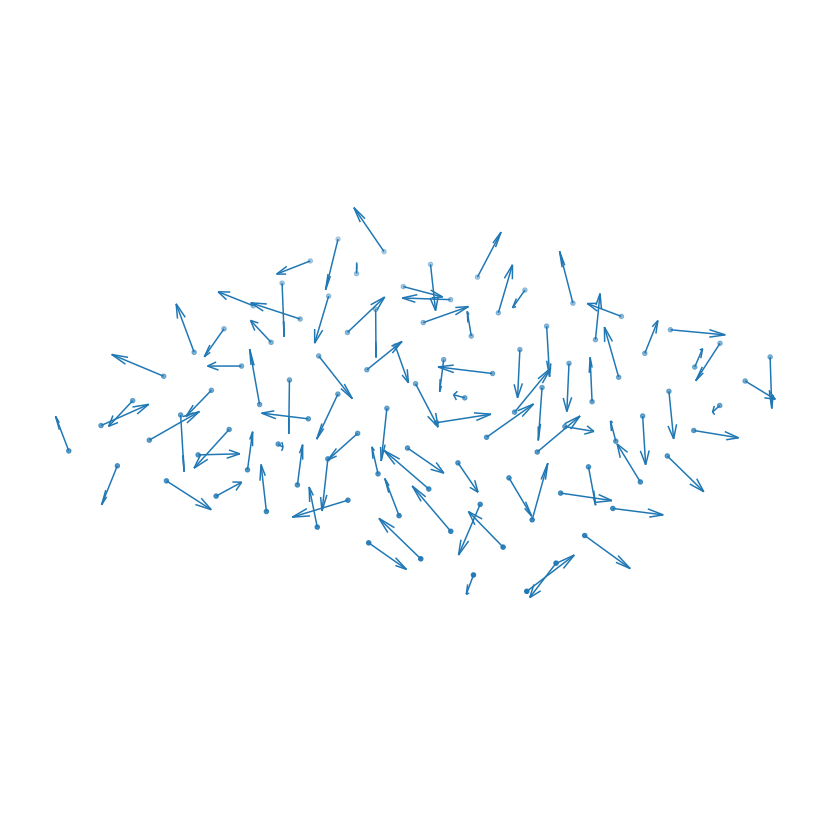

In [5]:
arrowplot = plt.axes(projection = '3d')

arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length,length, 2))

arrowplot.axis(False)

arrowplot.quiver(coords[0],coords[1],coords[2],
                 mag[0],mag[1],mag[2]

)

arrowplot.scatter3D(coords[0],coords[1],coords[2])

Okay, so far, we have created the necessary arrays for the magnetization array, coordinates of the spins. The next step is to calculate the energy of the configuration.

through the Monte Carlo program, we are looking for the configuration with the lowest energy. Here we have modeled the interaction to be nearest-neighbor, with the energy given by

$E = \sum_{\langle i,j \rangle} J_{ij}m_i.m_j$

Every spin only interacts with its next nearest neighbor, and in the following we will assume that $J>0$ and is uniform.

To circumvent the edge effects, we will  code up the periodic boundary conditions in the following -

In [6]:
J = 1
def energy_interaction(mag, x, y):
    return -0.5*J*np.dot(mag[:,x,y,0],mag[:,(x-1)%length,y,0]+mag[:,x,(y-1)%length,0]+mag[0:,(x+1)%length,y,0]+mag[:,x,(y+1)%length,0])

def total_energy(mag):
    energy = 0

    for x in range(length):
        for y in range(length):
            energy = energy + energy_interaction(mag, x, y)

    return energy 

Implementing the metropolis step-

We randomly select a spin. Reorient it along a random direction. Calulcate the energy of the whole ensemble now. Now here's the important part-

If the energy of the new configuration is lower than the old, we accept the new change. If it is not, we look at another spin again. We repeat this process several times to get to the lowest energy spin configuration. By design, we know the answer to be a ferromagnet (when all spins point in the same direction).

In [7]:
def metropolis(mag):

    #calculate the energy of a randomly selected spin:
    x = np.random.randint(length)
    y = np.random.randint(length)

    energyold = 2 * energy_interaction(mag, x , y) # we just want to calculate the energy for the spin we flipped, not the whole thing


    #reorient that spin in a random direction:

    randphi = 2*np.pi*np.random.rand()
    randtheta = np.pi*np.random.rand()

     #save the old magnetization for comparison:

    savemag = np.array(mag[:, x, y, 0])

    mag[:, x, y, 0] = np.array([np.cos(randphi)*np.sin(randtheta),np.sin(randphi)*np.sin(randtheta),np.cos(randtheta)])

   

    #compare energies-

    energynew = 2* energy_interaction(mag, x, y)

    if (energynew < energyold):
        energychange = energynew - energyold

    else:
        energychange = 0
        mag[:, x, y, 0] = savemag

    return [mag, energychange]

Now we run the function we wrote a million times, and plot the energy at each step later. We see that the energy goes down and
converges to a value

In [8]:
num_steps = 1000000

energy = total_energy(mag)
energyList = [energy]

for i in range(num_steps):
    mag, energychange = metropolis(mag)
    energy = energy + energychange
    energyList.append(energy)

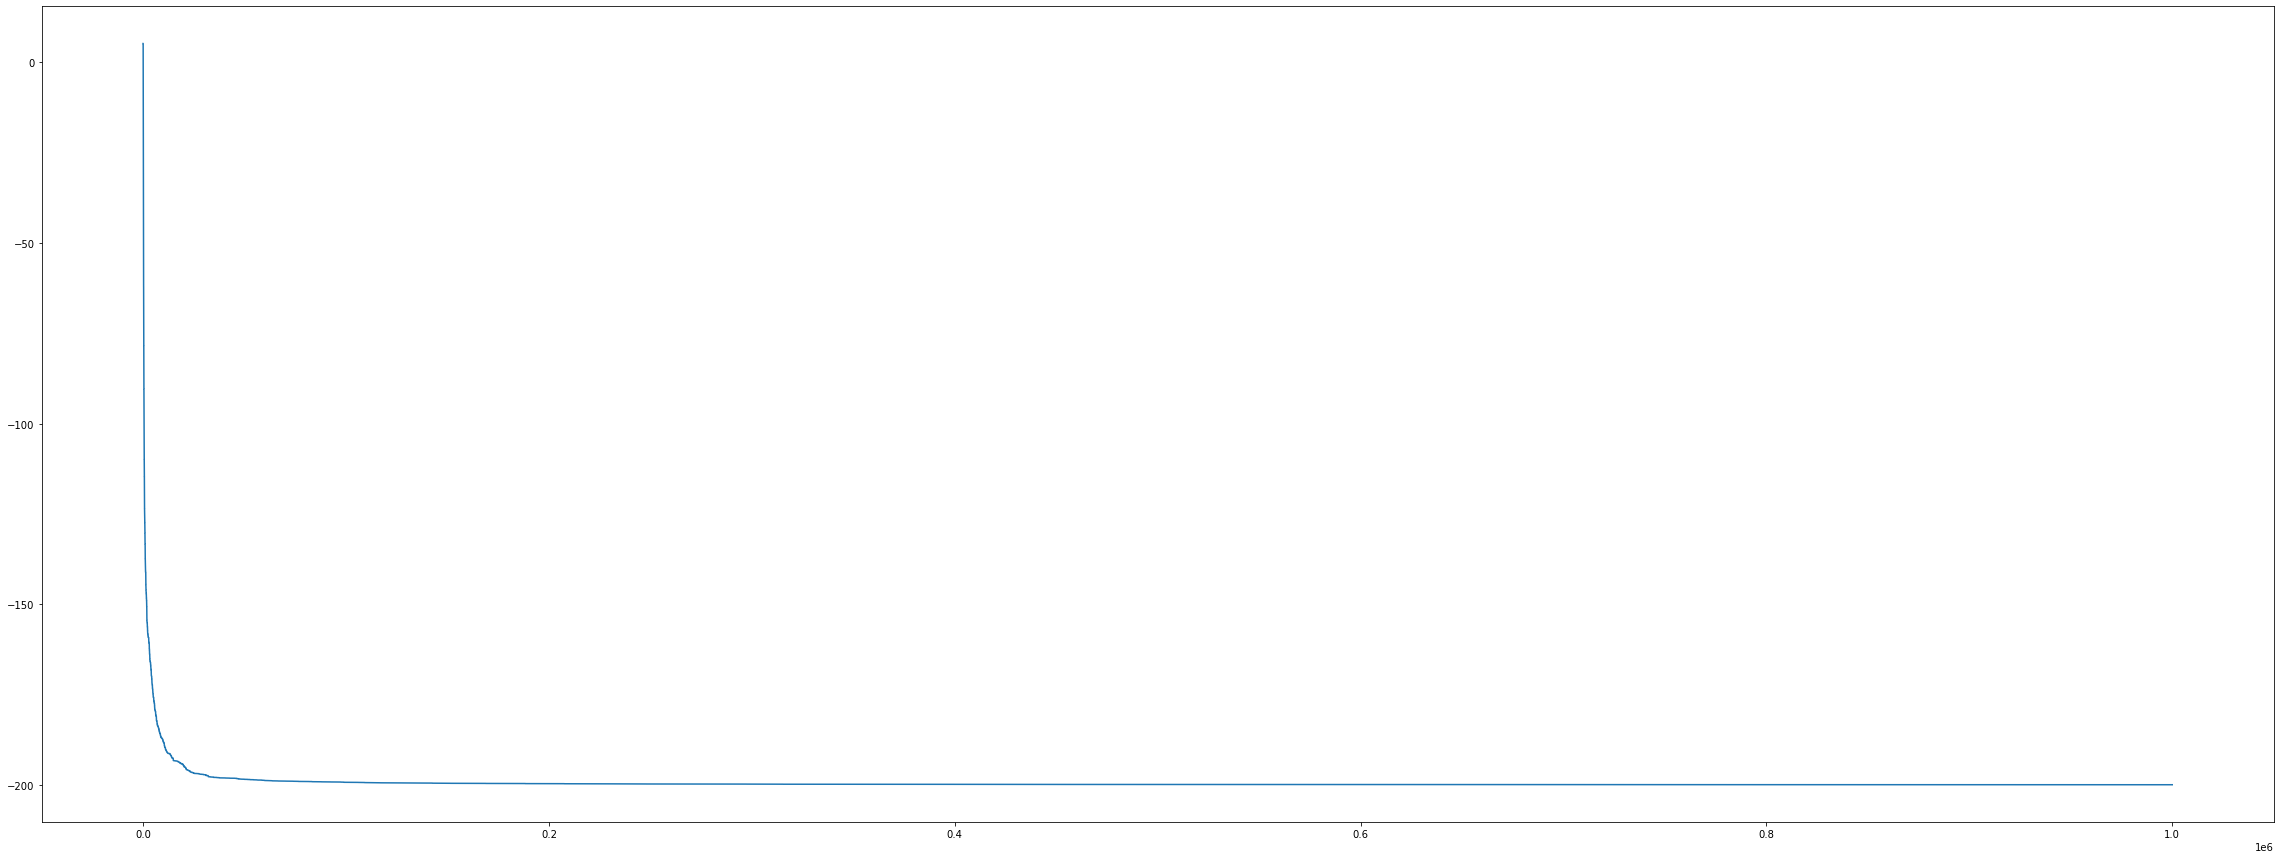

In [9]:
plt.plot(range(num_steps+1),energyList)

Now we plot the spin configuration we get at the end of our metropolis algorithm'

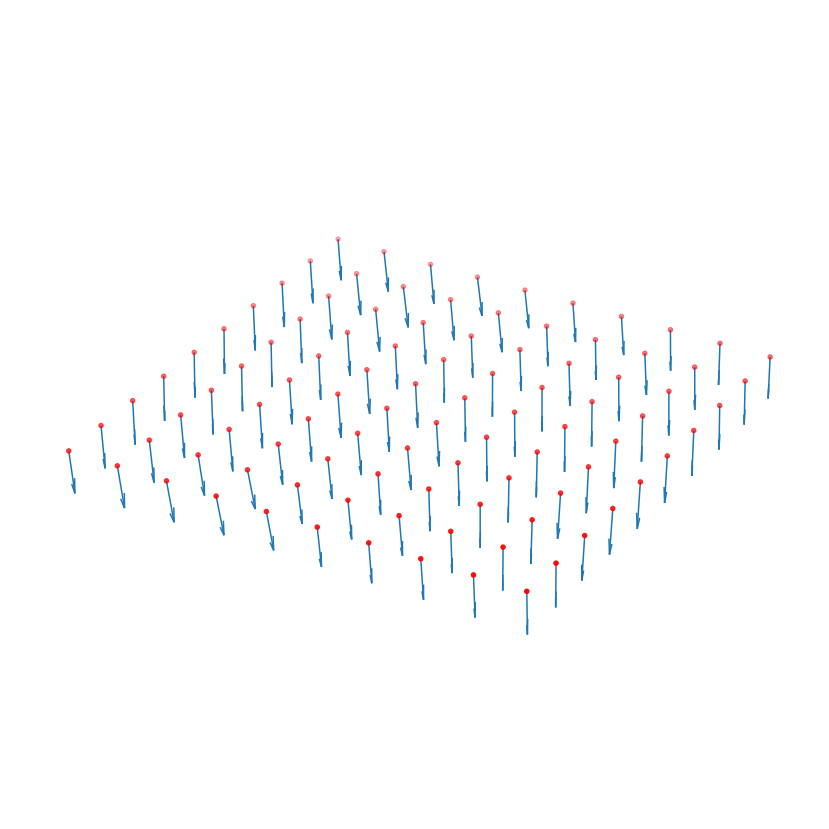

In [10]:
arrowplot = plt.axes(projection = '3d')

arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length,length,2))

arrowplot.axis(False)

arrowplot.quiver(coords[0],coords[1],coords[2],
                 mag[0],mag[1],mag[2]
                 )

arrowplot.scatter3D(coords[0],coords[1],coords[2], color = 'red')
